## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [2]:
TOKEN_SPAM_PROB = './SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB = './SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB = './SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX = './SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = './SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the data

In [3]:
# Features 
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

#Token probabilities 
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB, delimiter=' ')

In [4]:
X_test.shape

(1724, 2500)

In [5]:
prob_token_spam.shape

(2500,)

In [6]:
X_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
prob_token_all.min()

4.485330725861071e-06

## Set the Prior

$$ P( Spam | X) = \frac{P(X| Spam) P (Spam)}{P(X)} $$

In [8]:
PROB_SPAM = 0.3116
PROB_HAM = 1 - PROB_SPAM

In [9]:
np.log(prob_token_spam)

array([ -4.7050887 ,  -5.32150209,  -4.98517744, ...,  -9.9995096 ,
       -10.58729627, -11.503587  ])

## Joint Probability

In [10]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)  

In [11]:
joint_log_spam[:5]

array([  3.21980409,  13.35633005,  19.22584777, -16.5942041 ,
        27.98596092])

In [12]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(PROB_HAM)

In [13]:
joint_log_ham[:5]

array([-11.05454536, -36.86095549, -38.27360491,  -2.71374998,
       -60.20683388])

In [14]:
joint_log_ham.size

1724

In [15]:
joint_log_spam.size

1724

## Predicting 

In [16]:
prediction = joint_log_spam > joint_log_ham

In [17]:
prediction[-5:] * 1

array([0, 0, 0, 0, 0])

In [18]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Metrics and Accuracy

In [19]:
correct_docs = (y_test == prediction).sum()
wrong_docs = (y_test != prediction).sum()

In [20]:
print('Docs predicted correctly', correct_docs)
print('Docs predicted wrong', wrong_docs)

Docs predicted correctly 1672
Docs predicted wrong 52


In [21]:
print('Accuracy is', correct_docs / len(X_test))

Accuracy is 0.9698375870069605


## Visualisation of results

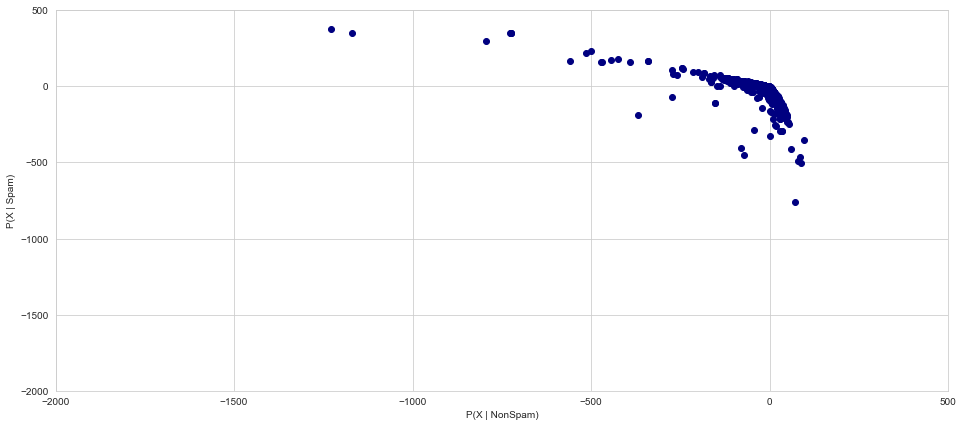

In [38]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'
plt.figure(figsize=(16, 7))

plt.ylabel(yaxis_label)
plt.xlabel(xaxis_label)

plt.xlim([-2000, 500])
plt.ylim([-2000, 500])
plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

In [34]:
# Chart styling 

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label : joint_log_spam, xaxis_label : joint_log_ham,
                          labels : y_test})

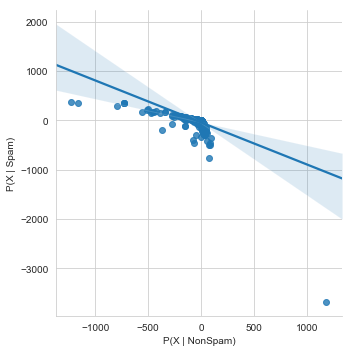

In [36]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df)

plt.show()

## False positives and False Negatives

In [39]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1165,  559]))

In [40]:
true_pos = (y_test ==1) & (prediction == 1)

In [43]:
true_pos.sum()

548

In [47]:
false_pos = (y_test == 0) & (prediction == 1)

In [46]:
false_neg = (y_test == 1) & (prediction == 0)

In [48]:
false_pos.sum()

11

In [49]:
false_neg.sum()

41

## Recall score 

In [56]:
recall = true_pos.sum() / (true_pos.sum() + false_neg.sum())

In [57]:
print('Recall score is {:.2%}'.format(recall))

Recall score is 93.04%


## Precision

In [58]:
precision = true_pos.sum() / (true_pos.sum() + false_pos.sum())

In [59]:
print('Precision score is {:.3%}'.format(precision))

Precision score is 98.032%


## F1 Score

In [60]:
f1_score = 2 * (precision * recall) / (precision + recall)

In [62]:
print('F1 Score is {:.2}'.format(f1_score))

F1 Score is 0.95
